In [1]:
import gymnasium as gym
print(gym.__version__)

0.26.1


## Cartpole

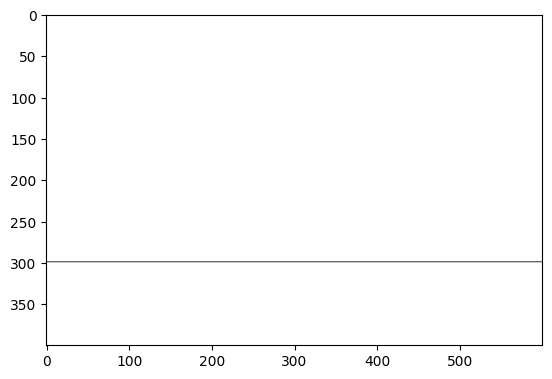

[-4.4627833 -9.169975   5.046544   2.3686776]


In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')

observation = env.reset()
print(f"observation = {observation}")

for _ in range(50):
    rgb_array = env.render()
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())
    observation, reward, terminated, truncated, info = env.step(0)
    print(observation)
plt.close()
env.close()

## Cartpole eazy algorithm

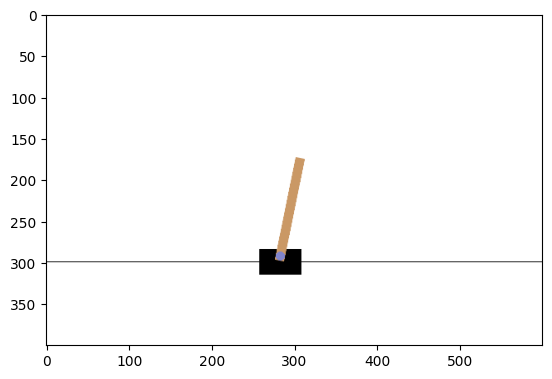

[-0.14361162 -0.23302174  0.21363914  0.37579438] True
39


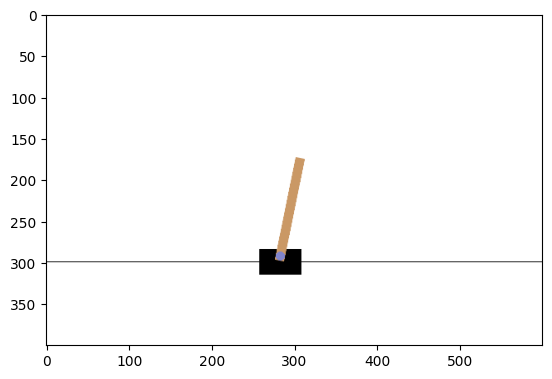

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for i in range(1, 40):
    rgb_array = env.render()
    # if 막대기가 오른쪽으로 기울어져 있다면: 오른쪽으로 힘을 가함
    # else: 왼쪽으로 힘을 가함

    # Eazy Control
    if observation[2] > 0:
        action = 1
    else: action = 0
    
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())

    observation, reward, terminated, truncated, info = env.step(action)
    print(observation, terminated)
    if terminated:
        print(i)
        break
env.close()

## Neural Network Cartpole

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for step_index in range(1000):
    rgb_array = env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    print(f"Step {step_index}")
    print(f"action: {action}")
    print(f"observation: {observation}")
    print(f"reward: {reward}")
    print(f"terminated: {terminated}")
    print(f"info: {info}")
    print(f"truncated: {truncated}")
    print("-"*80)
    if terminated:
        break

Step 0
action: 1
observation: [ 0.03382942  0.16113597  0.00551061 -0.30404744]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 1
action: 0
observation: [ 0.03705214 -0.03406408 -0.00057033 -0.0096317 ]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 2
action: 0
observation: [ 0.03637086 -0.22917785 -0.00076297  0.28287122]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 3
action: 0
observation: [ 0.03178731 -0.4242889   0.00489446  0.5753134 ]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 4
action: 0
observation: [ 0.02330153 -0.6194791   0.01640072  0.8695342 ]
reward: 1.0
terminated: False
info: {}
truncated: Fa

https://github.com/SaravananJaichandar/CartPole-Balancing-using-Neural-Network/tree/master

In [2]:
import random
import numpy as np
import gymnasium as gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2023-07-31 15:48:46.089559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env.reset(seed=17)

goal_steps = 500
score_requirement = 60
initial_games = 5000

In [5]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(initial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, terminated, truncated, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            score += reward
            if terminated:
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                training_data.append([data[0], output])
        
        env.reset()

    print(accepted_scores)
    
    return training_data

In [6]:
training_data = model_data_preparation()

[73.0, 60.0, 63.0, 89.0, 60.0, 61.0, 61.0, 78.0, 66.0, 67.0, 65.0, 62.0, 62.0, 77.0, 62.0, 62.0, 69.0, 66.0, 81.0, 83.0, 71.0, 82.0, 69.0, 65.0, 92.0, 62.0, 80.0, 61.0, 64.0, 61.0, 95.0, 72.0, 114.0, 75.0, 76.0, 65.0, 74.0, 61.0, 63.0, 62.0, 62.0, 72.0, 75.0, 60.0, 61.0, 62.0, 85.0, 65.0, 64.0, 65.0, 66.0, 62.0, 67.0, 70.0, 78.0, 78.0, 61.0, 82.0, 61.0, 63.0, 70.0, 85.0, 84.0, 60.0, 63.0, 68.0, 77.0, 78.0, 80.0, 63.0, 62.0, 61.0, 71.0, 69.0, 93.0, 70.0, 62.0, 63.0, 77.0, 99.0, 60.0, 75.0, 61.0, 78.0, 62.0, 81.0, 63.0, 76.0, 62.0]


In [7]:
def build_model(input_size, output_size):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam())

    return model

In [8]:
def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    print(X)
    print(y)
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=10)
    return model

In [10]:
trained_model = train_model(training_data)

[[-0.04865715 -0.21355955 -0.03317754  0.2664406 ]
 [-0.05292834 -0.01798018 -0.02784873 -0.03651942]
 [-0.05328795  0.17752983 -0.02857912 -0.3378572 ]
 ...
 [-0.19422305 -0.5910255   0.14781487  1.0288516 ]
 [-0.20604356 -0.78777224  0.1683919   1.364053  ]
 [-0.221799   -0.9845551   0.19567296  1.7043258 ]]
[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
Epoch 1/10


2023-07-31 15:49:51.049431: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-31 15:49:51.050045: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-31 15:49:51.079886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 15:49:51.080170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.5GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 174.97GiB/s
2023-07-31 15:49:51.080203: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-07-31 15:49:51.123607: I tensorflow/stream_executor/pl

193/193 [==============================] - 0s 619us/step - loss: 0.2821
Epoch 2/10
193/193 [==============================] - 0s 535us/step - loss: 0.2354
Epoch 3/10
193/193 [==============================] - 0s 571us/step - loss: 0.2316
Epoch 4/10
193/193 [==============================] - 0s 567us/step - loss: 0.2308
Epoch 5/10
193/193 [==============================] - 0s 583us/step - loss: 0.2333
Epoch 6/10
193/193 [==============================] - 0s 529us/step - loss: 0.2293
Epoch 7/10
193/193 [==============================] - 0s 519us/step - loss: 0.2325
Epoch 8/10
193/193 [==============================] - 0s 570us/step - loss: 0.2320
Epoch 9/10
193/193 [==============================] - 0s 491us/step - loss: 0.2314
Epoch 10/10
193/193 [==============================] - 0s 619us/step - loss: 0.2278


KeyboardInterrupt: 

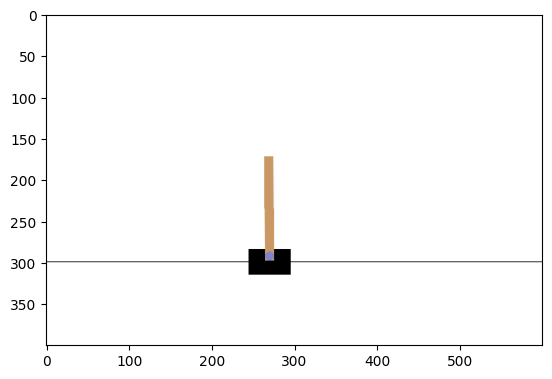

In [11]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        rgb_array = env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        plt.imshow(rgb_array)
        display.clear_output(wait = True)
        display.display(plt.gcf())
        choices.append(action)
        new_observation, reward, terminated, truncated, info = env.step(action)
        
        prev_obs = new_observation
        score+=reward
        if terminated:
            break

    env.reset()
    scores.append(score)

print(scores)
print('Average Score:',sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))

## DQN Cartpole

In [2]:
import gymnasium as gym
import tensorflow as tf
import numpy as np
import random
from collections import deque

# Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_dim=4, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='linear')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error',
              )
# model.compile()

score = []
memory = deque(maxlen=2000)

# CartPole 환경 구성
env = gym.make('CartPole-v1', render_mode='rgb_array')

In [ ]:

# 1000회의 에피소드 시작
for i in range(100):

    state = env.reset()
    state = np.reshape(state, [1, 4])
    eps = 1 / (i / 50 + 10)

    # 200 timesteps
    for t in range(200):

        # Inference: e-greedy
        if np.random.rand() < eps:
            action = np.random.randint(0, 2)
        else:
            predict = model.predict(state)
            action = np.argmax(predict)

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 4])

        memory.append((state, action, reward, next_state, done))
        state = next_state

        if done or t == 199:
            print('Episode', i, 'Score', t + 1)
            score.append(t + 1)
            break

    # Training
    if i > 10:
        minibatch = random.sample(memory, 16)

        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + 0.9 * np.amax(model.predict(next_state)[0])
            target_outputs = model.predict(state)
            target_outputs[0][action] = target
            model.fit(state, target_outputs, epochs=1, verbose=0)

env.close()
print(score)